The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

### Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

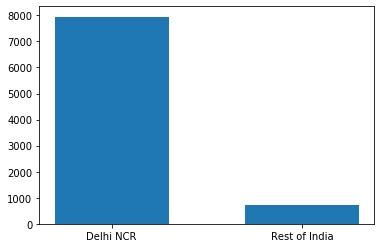

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='latin-1')
df2 = df[df['Country Code']==1].copy(deep=True)
df_ncr = df[(df['City']=='Ghaziabad') | (df['City']=='Noida') | (df['City']=='Gurgaon') | (df['City']=='Faridabad') | (df['City']=='New Delhi')]
len_ncr = df_ncr.count()[0] # 7947
len_rest = df2.count()[0] - len_ncr

num_res = [len_ncr, len_rest]
res_city = ['Delhi NCR', 'Rest of India']

plt.bar(res_city, num_res, width=0.6)
plt.show()


### Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [51]:
import pandas as pd

df = pd.read_csv('zomato.csv', encoding='latin-1')
df_India = df[df['Country Code']==1].copy(deep=True)
df_India.reset_index(drop=True,inplace=True)
df_ncr = df_India[(df_India['City']=='Ghaziabad') | (df_India['City']=='Noida') | (df_India['City']=='Gurgaon') | (df_India['City']=='Faridabad') | (df_India['City']=='New Delhi')].copy(deep=True)
df_rest = df_India[(df_India['City']!='Ghaziabad') & (df_India['City']!='Noida') & (df_India['City']!='Gurgaon') & (df_India['City']!='Faridabad') & (df_India['City']!='New Delhi')].copy(deep=True)
df_ncr.reset_index(drop=True,inplace=True)
df_rest.reset_index(drop=True,inplace=True)

ncr_cuisines = {}
rest_cuisines = {}
def fill_ncr_cuisines(cuisines):
    cuis_list = [cuis.strip() for cuis in cuisines.strip().split(',')]
    for cuis in cuis_list:
        ncr_cuisines[cuis] = ncr_cuisines.get(cuis,0) + 1

def fill_rest_cuisines(cuisines):
    cuis_list = [cuis.strip() for cuis in cuisines.strip().split(',')]
    for cuis in cuis_list:
        rest_cuisines[cuis] = rest_cuisines.get(cuis,0) + 1

df_ncr['Cuisines'].apply(fill_ncr_cuisines)
df_rest['Cuisines'].apply(fill_rest_cuisines)
cuis_not_in_ncr = []
for city in rest_cuisines:
    if ncr_cuisines.get(city,0)==0:
        cuis_not_in_ncr.append(city)

print(cuis_not_in_ncr)

['German', 'Malwani', 'BBQ', 'Cajun']


In [52]:
# Now we chk in Api whether above cuisines not served in NCR or it is due to incomplete dataset
import requests
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines', headers={'user-key':'7012e5af5250463bb007a5c4ef01f4fd'},
                   params={'city_id':1})
py_data = res.json()
for i in py_data['cuisines']:
    if i['cuisine']['cuisine_name'].strip()=='German':
        print('Gernam is servered in NCR')
    elif i['cuisine']['cuisine_name'].strip()=='Malwani':
        print('Malwani is servered in NCR')
    elif i['cuisine']['cuisine_name'].strip()=='BBQ':
        print('BBQ is servered in NCR')
    elif i['cuisine']['cuisine_name'].strip()=='Cajun'.strip:
        print('Cajun is servered in NCR')

BBQ is servered in NCR
Malwani is servered in NCR


### Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

North Indian  -  3597 restaurants
Chinese  -  2448 restaurants
Fast Food  -  1866 restaurants
Mughlai  -  933 restaurants
Bakery  -  697 restaurants
South Indian  -  569 restaurants
Continental  -  547 restaurants
Desserts  -  542 restaurants
Street Food  -  538 restaurants
Italian  -  535 restaurants
---------------------------------
North Indian  -  349 restaurants
Chinese  -  242 restaurants
Continental  -  177 restaurants
Italian  -  147 restaurants
Cafe  -  136 restaurants
Fast Food  -  97 restaurants
South Indian  -  62 restaurants
Mughlai  -  59 restaurants
Desserts  -  55 restaurants
Mexican  -  50 restaurants


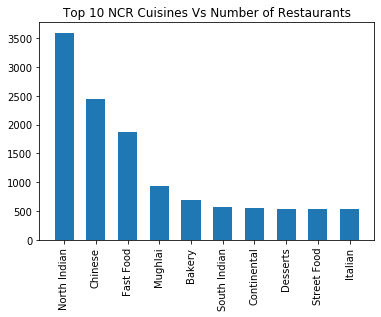

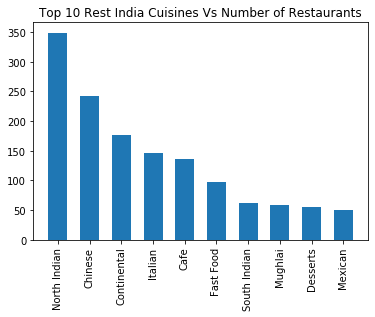

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='latin-1')
df_India = df[df['Country Code']==1].copy(deep=True)
df_India.reset_index(drop=True,inplace=True)
df_ncr = df_India[(df_India['City']=='Ghaziabad') | (df_India['City']=='Noida') | (df_India['City']=='Gurgaon') | (df_India['City']=='Faridabad') | (df_India['City']=='New Delhi')].copy(deep=True)
df_rest = df_India[(df_India['City']!='Ghaziabad') & (df_India['City']!='Noida') & (df_India['City']!='Gurgaon') & (df_India['City']!='Faridabad') & (df_India['City']!='New Delhi')].copy(deep=True)
df_ncr.reset_index(drop=True,inplace=True)
df_rest.reset_index(drop=True,inplace=True)

ncr_cuisines = {}
rest_cuisines = {}
def fill_ncr_cuisines(cuisines):
    cuis_list = [cuis.strip() for cuis in cuisines.strip().split(',')]
    for cuis in cuis_list:
        ncr_cuisines[cuis] = ncr_cuisines.get(cuis,0) + 1

def fill_rest_cuisines(cuisines):
    cuis_list = [cuis.strip() for cuis in cuisines.strip().split(',')]
    for cuis in cuis_list:
        rest_cuisines[cuis] = rest_cuisines.get(cuis,0) + 1

df_ncr['Cuisines'].apply(fill_ncr_cuisines)
df_rest['Cuisines'].apply(fill_rest_cuisines)

num_ncr_cuis = list(ncr_cuisines.items())
num_rest_cuis = list(rest_cuisines.items())

num_ncr_cuis.sort(key = lambda x: x[1])
num_ncr_cuis = num_ncr_cuis[::-1]

num_rest_cuis.sort(key = lambda x: x[1])
num_rest_cuis = num_rest_cuis[::-1]

rest_cuis = []
num_rest = [] # Number of restaurants which are in rest of India
ncr_cuis = []
num_ncr  =[] # Number of restaurants which are in NCR

# Print top 10 cuisines served by maximum number of restaurants in Delhi NCR
for i in range(10):
    print(num_ncr_cuis[i][0], " - ", num_ncr_cuis[i][1],'restaurants')
    ncr_cuis.append(num_ncr_cuis[i][0])
    num_ncr.append(num_ncr_cuis[i][1])
    
print("---------------------------------")

# Print top 10 cuisines served by maximum number of restaurants in rest of India
for i in range(10):
    print(num_rest_cuis[i][0], " - ", num_rest_cuis[i][1], 'restaurants')
    rest_cuis.append(num_rest_cuis[i][0])
    num_rest.append(num_rest_cuis[i][1])

plt.bar(ncr_cuis, num_ncr, width=0.6)
plt.xticks(rotation=90)
plt.title("Top 10 NCR Cuisines Vs Number of Restaurants")
plt.show()

plt.bar(rest_cuis, num_rest, width=0.6)
plt.xticks(rotation=90)
plt.title("Top 10 Rest India Cuisines Vs Number of Restaurants")
plt.show()


### Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

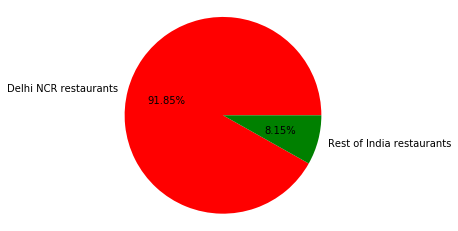

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Here we plot pie graph showing percentage of restaurants seving cuisines in delhi ncr vs rest of india
df = pd.read_csv('zomato.csv', encoding='latin-1')
df2 = df[df['Country Code']==1].copy(deep=True)
df_ncr = df[(df['City']=='Ghaziabad') | (df['City']=='Noida') | (df['City']=='Gurgaon') | (df['City']=='Faridabad') | (df['City']=='New Delhi')]
len_ncr = df_ncr.count()[0] # 7947
len_rest = df2.count()[0] - len_ncr

num_res = [len_ncr, len_rest]
res_city = ['Delhi NCR restaurants', 'Rest of India restaurants']

total = len_ncr + len_rest
plt.pie(num_res, colors=['red','green'],labels = res_city, autopct="%.2f%%")
plt.axis('equal')
plt.show()